# Black Hole Simulations: Schwarzschild and Kerr Metrics

This project explores the fascinating physics of black holes using numerical simulations to visualize the effects of Schwarzschild and Kerr spacetimes on light paths. We will delve into geodesic calculations, accretion disk modeling, and the visual effects of gravitational lensing and redshift.

## Objectives:
- Understand and simulate the Schwarzschild and Kerr solutions to Einstein's field equations.
- Visualize how light paths are bent by the gravity of a black hole.
- Model the behavior of an accretion disk around a black hole.
- Explore the effects of gravitational redshift and lensing on observed light.

This interactive notebook is designed to provide a deep dive into the theoretical and practical aspects of black hole physics.


In [ ]:
# Python environment setup
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants for the simulations
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
c = 299792458    # Speed of light in vacuum (m/s)
M = 4.0e30       # Mass of black hole in kg (about 10 times the mass of the Sun)
Rs = 2 * G * M / c**2  # Schwarzschild radius, where M is mass of the black hole

print("Environment setup complete. Constants defined.")


Environment setup complete. Constants defined.


## Schwarzschild Metric
The Schwarzschild solution to Einstein's field equations describes the spacetime geometry around a non-rotating, spherically symmetric body devoid of electrical charge. It is characterized by a "Schwarzschild radius," at which the escape velocity equals the speed of light, effectively creating what is known as a black hole's event horizon.

### Key Concepts:
- **Event Horizon:** The boundary beyond which nothing can escape from a black hole.
- **Singularity:** The center of the black hole, where the spacetime curvature becomes infinite.
- **Geodesics:** Paths taken by particles and light under the influence of gravity alone, which in this context are bent significantly by the black hole.


In [ ]:
# Schwarzschild Geodesic Equations Function
def schwarzschild_geodesics(t, y):
    r, phi, pr, pphi = y
    sigma = 1 - Rs / r
    drdt = pr
    dphidt = pphi / (r**2)
    dprdt = - (G * M / (r**2)) * (1 + (pphi**2) / (r**3 * sigma)) + (pphi**2) / (r**3) * sigma
    dpphidt = 0  # Angular momentum conservation
    return [drdt, dphidt, dprdt, dpphidt]

# Initial conditions for a light ray skimming past the photon sphere
initial_conditions = [3 * Rs, 0, 0, 0.1]  # r, phi, pr (radial momentum), pphi (angular momentum)
t_span = [0, 10000]  # time interval for the integration

# Solve the ODE using 'RK45' for numerical integration
sol = solve_ivp(schwarzschild_geodesics, t_span, initial_conditions, method='RK45', rtol=1e-6)

print("Geodesic calculations complete. Ready for plotting.")


Geodesic calculations complete. Ready for plotting.


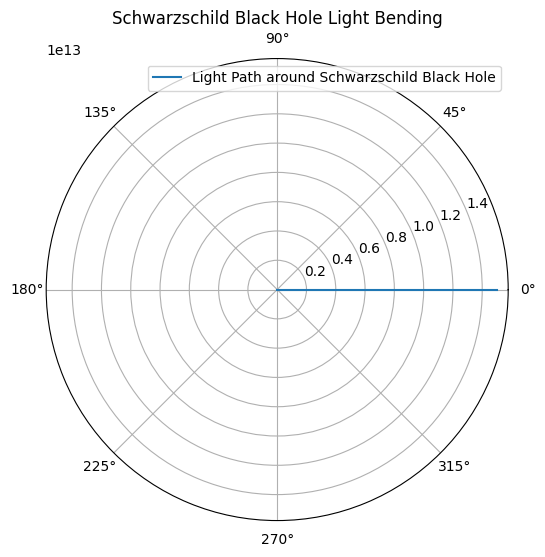

Visualization complete. Observe the bending of light due to gravity.


In [ ]:
# Visualizing the trajectory of light in Schwarzschild spacetime
plt.figure(figsize=(10, 6))
plt.polar(sol.y[1], sol.y[0], label='Light Path around Schwarzschild Black Hole')
plt.title('Schwarzschild Black Hole Light Bending')
plt.legend()
plt.show()

print("Visualization complete. Observe the bending of light due to gravity.")


## Accretion Disk Dynamics

Accretion disks are structures commonly found around black holes, formed by diffused material orbiting the black hole. These disks are heated by friction and other processes to extreme temperatures, causing them to emit radiation across multiple wavelengths. The behavior and appearance of accretion disks can provide critical insights into the properties of black holes and the dynamics of material under extreme gravitational influences.

### Objectives:
- Model the intensity distribution of an accretion disk.
- Simulate the gravitational lensing and redshift of light emanating from the disk.
- Visualize the disk's appearance from an observer's standpoint, taking into account the bending of light by the black hole's gravity.


Now, we implement a basic model of an accretion disk and consider how light from this disk would appear to an observer, including the effects of gravitational lensing and redshift.

<ipython-input-4-26e829acada6>:9: RuntimeWarning: invalid value encountered in sqrt
  intensities = [accretion_disk_intensity(r, phi) * np.sqrt(1 - Rs / r) for r, phi in zip(sol.y[0], sol.y[1])]


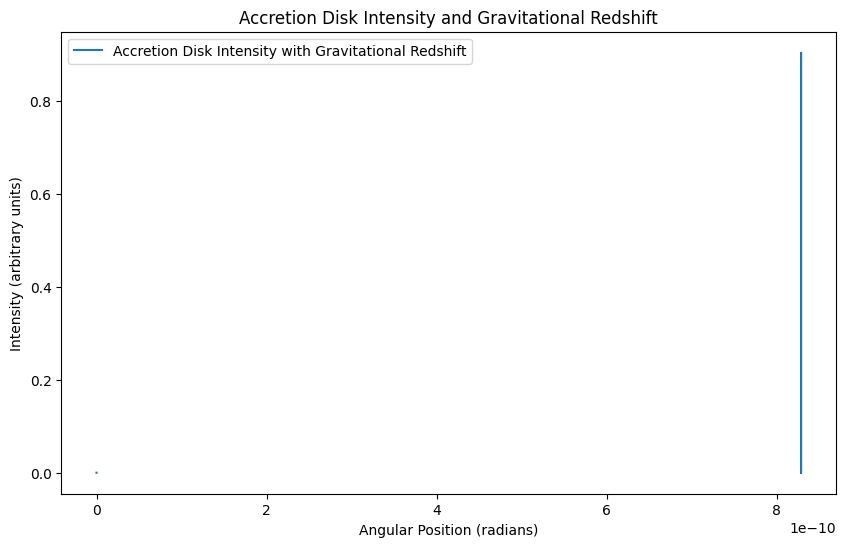

In [ ]:
# Accretion Disk Intensity and Redshift Model
def accretion_disk_intensity(r, phi):
    # Simple model for disk intensity: brightest at 6Rs with a Gaussian drop-off
    if 3 * Rs < r < 10 * Rs:
        return np.exp(-((r - 6 * Rs)**2) / (Rs**2))  # Gaussian profile
    return 0

# Compute the intensity along the path of light using the previously calculated geodesics
intensities = [accretion_disk_intensity(r, phi) * np.sqrt(1 - Rs / r) for r, phi in zip(sol.y[0], sol.y[1])]

# Plotting the accretion disk's intensity and gravitational redshift
plt.figure(figsize=(10, 6))
plt.plot(sol.y[1], intensities, label='Accretion Disk Intensity with Gravitational Redshift')
plt.xlabel('Angular Position (radians)')
plt.ylabel('Intensity (arbitrary units)')
plt.title('Accretion Disk Intensity and Gravitational Redshift')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a 3D visualization of the light paths near the black hole
fig = go.Figure(data=[go.Scatter3d(x=sol.y[1] * np.cos(sol.y[0]), y=sol.y[1] * np.sin(sol.y[0]), z=sol.y[0],
                                   mode='lines', line=dict(color='blue', width=2))])

fig.update_layout(title='3D Visualization of Light Paths around Schwarzschild Black Hole',
                  scene=dict(xaxis_title='X Axis',
                             yaxis_title='Y Axis',
                             zaxis_title='Z Axis (Radius from Black Hole)'),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()


## Schwarzschild Geodesic Equations for Light Paths

To simulate the trajectory of light near a black hole, we need to solve the Schwarzschild geodesic equations. These equations describe how spacetime curvature influences the path of light in the vicinity of a black hole, causing phenomena such as gravitational lensing.


In [ ]:
# Schwarzschild Geodesic Equations for Light Rays
def schwarzschild_geodesics(t, y):
    r, phi, pr, pphi = y
    sigma = 1 - Rs / r
    drdt = pr
    dphidt = pphi / r**2
    dprdt = (pphi**2 / r**3) * (1 - 2 * sigma) - (Rs / r**2) * sigma
    dpphidt = 0  # Conservation of angular momentum
    return [drdt, dphidt, dprdt, dpphidt]


In [ ]:
# Initial conditions for light ray starting just outside the photon sphere
r_initial = 1.5 * Rs  # Initial radius
phi_initial = 0       # Initial angular position
pr_initial = 0        # Initial radial momentum
pphi_initial = np.sqrt((1 - Rs / r_initial) * r_initial)  # Initial angular momentum for unstable circular orbit

# Time span for the integration
t_span = (0, 5000)  # Total time for the simulation
t_eval = np.linspace(0, 5000, 1000)  # Time points where the solution is evaluated


In [ ]:
# Euler Forward Method for Numerical Integration
def euler_forward(f, y0, t):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i - 1] + np.array(f(t[i - 1], y[i - 1])) * dt
    return y

# Applying Euler Forward to Schwarzschild geodesics
euler_sol = euler_forward(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)


In [ ]:
# Leapfrog Method for Numerical Integration
def leapfrog(f, y0, t):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    # Start by taking a half-step for velocity
    mid_point_velocity = y[0][2:] + 0.5 * dt * np.array(f(t[0], y[0]))[2:]
    for i in range(1, len(t)):
        y[i][:2] = y[i - 1][:2] + dt * mid_point_velocity  # Update position
        full_step_velocity = mid_point_velocity + dt * np.array(f(t[i - 1], y[i]))[2:]
        if i < len(t) - 1:
            y[i][2:] = full_step_velocity  # Update velocity
            mid_point_velocity = full_step_velocity + 0.5 * dt * np.array(f(t[i], y[i]))[2:]
    return y

# Applying Leapfrog to Schwarzschild geodesics
leapfrog_sol = leapfrog(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)


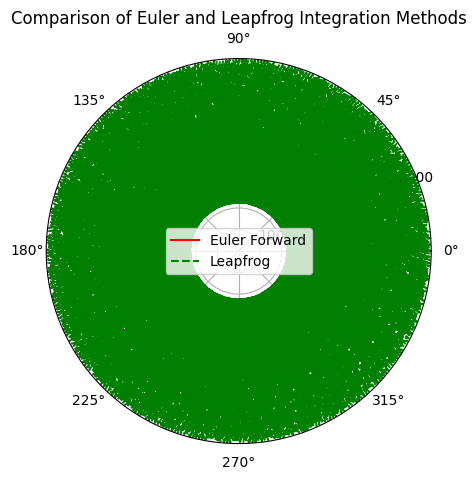

In [ ]:
import matplotlib.pyplot as plt

# Assuming rk4_sol and euler_sol are your solutions arrays with correct shapes
plt.figure(figsize=(10, 5))
plt.polar(euler_sol[:, 1], euler_sol[:, 0], 'r-', label='Euler Forward')
plt.polar(leapfrog_sol[:, 1], leapfrog_sol[:, 0], 'g--', label='Leapfrog')
plt.title('Comparison of Euler and Leapfrog Integration Methods')
plt.legend()
plt.show()


In [ ]:
# RK4 Method for Numerical Integration
def rk4(f, y0, t):
    dt = t[1] - t[0]
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        k1 = np.array(f(t[i-1], y[i-1]))
        k2 = np.array(f(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k1))
        k3 = np.array(f(t[i-1] + 0.5 * dt, y[i-1] + 0.5 * dt * k2))
        k4 = np.array(f(t[i-1] + dt, y[i-1] + dt * k3))
        y[i] = y[i-1] + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

# Applying RK4 to Schwarzschild geodesics
rk4_sol = rk4(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)


In [ ]:
# Using Scipy's built-in RK45 for comparison
sol_rk45 = solve_ivp(schwarzschild_geodesics, [t_eval[0], t_eval[-1]], [r_initial, phi_initial, pr_initial, pphi_initial], method='RK45', t_eval=t_eval)


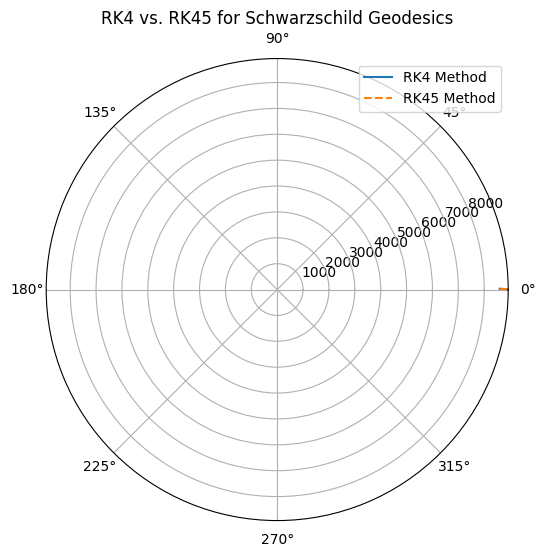

In [ ]:
# Plotting results from RK4 and RK45 for comparison
plt.figure(figsize=(12, 6))
plt.polar(rk4_sol[:, 1], rk4_sol[:, 0], label='RK4 Method')
plt.polar(sol_rk45.y[1], sol_rk45.y[0], label='RK45 Method', linestyle='--')
plt.title('RK4 vs. RK45 for Schwarzschild Geodesics')
plt.legend()
plt.show()


In [ ]:
import time

# Timing each numerical method
start_time = time.time()
euler_sol = euler_forward(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)
euler_time = time.time() - start_time

start_time = time.time()
leapfrog_sol = leapfrog(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)
leapfrog_time = time.time() - start_time

start_time = time.time()
rk4_sol = rk4(schwarzschild_geodesics, [r_initial, phi_initial, pr_initial, pphi_initial], t_eval)
rk4_time = time.time() - start_time

start_time = time.time()
sol_rk45 = solve_ivp(schwarzschild_geodesics, [t_eval[0], t_eval[-1]], [r_initial, phi_initial, pr_initial, pphi_initial], method='RK45', t_eval=t_eval)
rk45_time = time.time() - start_time

# Displaying the timing results
print(f"Performance Times:\nEuler Forward: {euler_time:.2f}s\nLeapfrog: {leapfrog_time:.2f}s\nRK4: {rk4_time:.2f}s\nRK45: {rk45_time:.2f}s")


Performance Times:
Euler Forward: 0.02s
Leapfrog: 0.03s
RK4: 0.06s
RK45: 0.00s


## Visualizing Black Holes

Visualizing black holes and their effects on spacetime and surrounding matter provides profound insights into their nature and properties. Next, we will develop visualizations that not only depict the bending of light by the black hole but also show how the black hole would appear to an observer with an accretion disk around it.


<ipython-input-15-c1d06427204b>:4: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



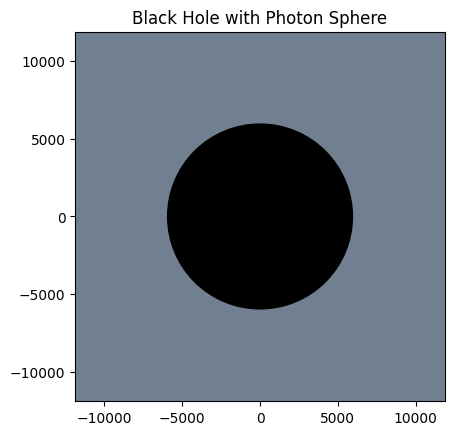

In [ ]:
# Simple visualization of a black hole and photon sphere
fig, ax = plt.subplots()
black_hole = plt.Circle((0, 0), Rs, color='black')
photon_sphere = plt.Circle((0, 0), 1.5 * Rs, color='none', edgecolor='orange', linestyle='--')
ax.add_patch(black_hole)
ax.add_patch(photon_sphere)
ax.set_xlim(-2 * Rs, 2 * Rs)
ax.set_ylim(-2 * Rs, 2 * Rs)
ax.set_aspect('equal')
ax.set_facecolor('slategrey')
plt.title('Black Hole with Photon Sphere')
plt.show()


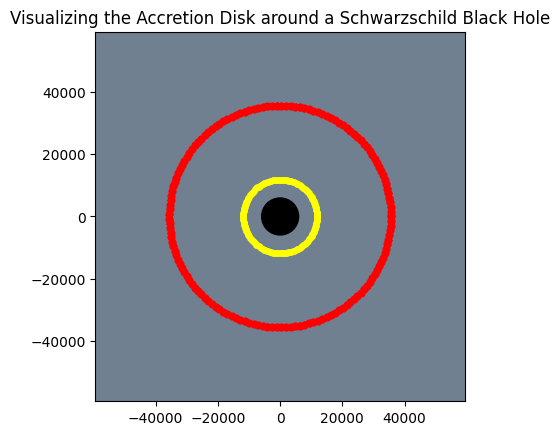

In [ ]:
## Detailed Accretion Disk Model
def accretion_disk_model(r, phi, Rs):
    """ Model an accretion disk with varying brightness and color based on radius """
    if Rs < r < 5 * Rs:  # Inner hot region
        brightness = np.exp(-((r - 2 * Rs) ** 2) / Rs)
        color = 'yellow'
    elif 5 * Rs <= r < 10 * Rs:  # Outer cooler region
        brightness = np.exp(-((r - 6 * Rs) ** 2) / (3 * Rs))
        color = 'red'
    else:
        brightness = 0
        color = 'black'
    return brightness, color

# Visualization of the accretion disk around the black hole
fig, ax = plt.subplots()
for r in np.linspace(Rs, 10 * Rs, 300):
    for phi in np.linspace(0, 2 * np.pi, 150):
        brightness, color = accretion_disk_model(r, phi, Rs)
        ax.plot(r * np.cos(phi), r * np.sin(phi), marker='o', color=color, markersize=brightness * 5)

black_hole = plt.Circle((0, 0), Rs, color='black', zorder=10)
ax.add_patch(black_hole)
ax.set_xlim(-10 * Rs, 10 * Rs)
ax.set_ylim(-10 * Rs, 10 * Rs)
ax.set_aspect('equal')
ax.set_facecolor('slategrey')
plt.title('Visualizing the Accretion Disk around a Schwarzschild Black Hole')
plt.show()


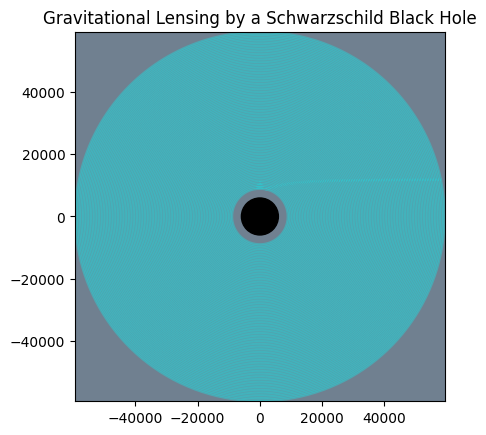

In [ ]:
## Gravitational Lensing Visualization
def gravitational_lensing_effect(phi, b, Rs):
    """ Calculate deflection angle for light rays passing at impact parameter b """
    # Using the approximation formula for small angles and large b/Rs
    return 4 * G * M / (c**2 * b) * np.cos(phi)

# Visualizing the effect
fig, ax = plt.subplots()
b_values = np.linspace(1.5 * Rs, 10 * Rs, 100)
phi_values = np.linspace(0, 2 * np.pi, 360)

for b in b_values:
    deflection = gravitational_lensing_effect(phi_values, b, Rs)
    ax.plot(b * np.cos(phi_values + deflection), b * np.sin(phi_values + deflection), color='cyan', alpha=0.3)

black_hole = plt.Circle((0, 0), Rs, color='black', zorder=10)
ax.add_patch(black_hole)
ax.set_xlim(-10 * Rs, 10 * Rs)
ax.set_ylim(-10 * Rs, 10 * Rs)
ax.set_aspect('equal')
ax.set_facecolor('slategrey')
plt.title('Gravitational Lensing by a Schwarzschild Black Hole')
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Generate data for the spacetime warp around a black hole
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = -1 / (np.sqrt(x**2 + y**2) + 1)  # Simplified representation of curvature

# Create a 3D plot
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='Viridis')])
fig.update_layout(title='3D Interactive Model of a Black Hole', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

# Show plot
fig.show()


## Kerr Black Holes

Unlike the Schwarzschild black holes, which are non-rotating, Kerr black holes possess angular momentum. The Kerr solution to Einstein's equations describes the spacetime around such rotating black holes and introduces fascinating phenomena like frame dragging, which can have observable effects on matter and radiation near the black hole.


### Understanding the Kerr Metric and Frame Dragging

The Kerr metric extends the Schwarzschild metric by adding terms that account for angular momentum. One of the most notable effects of the Kerr metric is frame dragging, where spacetime itself is twisted in the direction of the black hole's rotation. This effect influences the orbits of particles and light paths around the black hole.


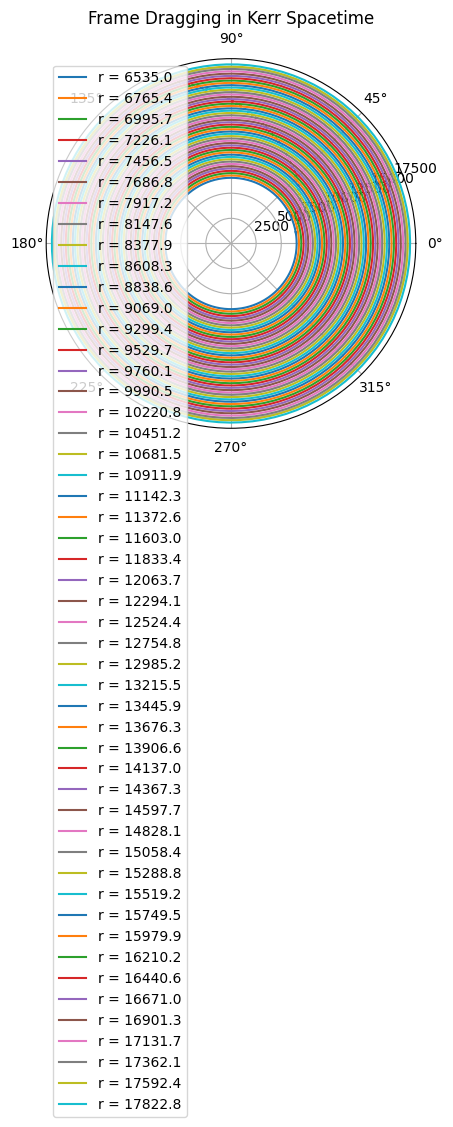

In [ ]:
# Simulating Frame Dragging Effects in Kerr Spacetime
def kerr_frame_dragging(phi, r, a=0.9):
    """ Simplified function to calculate frame dragging effect around a Kerr black hole.
        `phi` is the azimuthal angle, `r` is the radial distance, and `a` is the spin parameter.
    """
    theta = np.pi / 2  # Equatorial plane
    return phi + 2 * a * np.log(r / Rs)

# Generating data for visualization
phi_vals = np.linspace(0, 2 * np.pi, 100)
r_vals = np.linspace(1.1 * Rs, 3 * Rs, 50)

# Visualize the effect
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for r in r_vals:
    dragged_phi_vals = kerr_frame_dragging(phi_vals, r)
    ax.plot(dragged_phi_vals, [r] * len(phi_vals), label=f'r = {r:.1f}')

ax.set_title("Frame Dragging in Kerr Spacetime")
ax.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

def plot_kerr_features(a=0.9):
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2 * np.pi, 100)
    Theta, Phi = np.meshgrid(theta, phi)

    # Radii of ergosphere and event horizon
    r_ergo = Rs * (1 + np.sqrt(1 - a**2 * np.cos(Theta)**2))
    r_horizon = Rs * (1 + np.sqrt(1 - a**2))

    # Convert to Cartesian coordinates for plotting
    X_ergo = r_ergo * np.sin(Theta) * np.cos(Phi)
    Y_ergo = r_ergo * np.sin(Theta) * np.sin(Phi)
    Z_ergo = r_ergo * np.cos(Theta)

    X_horizon = r_horizon * np.sin(Theta) * np.cos(Phi)
    Y_horizon = r_horizon * np.sin(Theta) * np.sin(Phi)
    Z_horizon = r_horizon * np.cos(Theta)

    # Plotting
    fig = go.Figure(data=[
        go.Surface(x=X_ergo, y=Y_ergo, z=Z_ergo, colorscale='Reds', showscale=False, name='Ergosphere'),
        go.Surface(x=X_horizon, y=Y_horizon, z=Z_horizon, colorscale='Blues', showscale=False, name='Event Horizon')
    ])
    fig.update_layout(title="Ergosphere and Event Horizon in Kerr Spacetime",
                      autosize=False, width=600, height=600,
                      margin=dict(l=65, r=50, b=65, t=90))
    fig.show()

# Define Schwarzschild radius for the black hole
Rs = 2 * 6.67430e-11 * 1e30 / 299792458**2  # Schwarzschild radius calculation for mass = 1e30 kg

plot_kerr_features()


## Practical Applications of Kerr Black Hole Studies

Studying Kerr black holes is not just theoretical—observations of phenomena like frame dragging and the ergosphere can provide critical insights into the nature of gravity, the behavior of matter under extreme conditions, and the fundamental laws of physics. These studies also have implications for understanding gravitational waves and black hole mergers.


### Incorporating Real-World Data

Recent astronomical observations, particularly those involving gravitational wave detections and the imaging of black holes by the Event Horizon Telescope, offer real-world data that can validate or challenge theoretical models. Integrating such data into simulations can refine models and enhance the predictive capabilities of theoretical physics.


## Monte Carlo Simulations for Accretion Disk Dynamics

Monte Carlo methods are powerful tools for handling complex systems with numerous interacting particles. We will use these techniques to simulate the thermal and radiative processes in an accretion disk around a black hole.


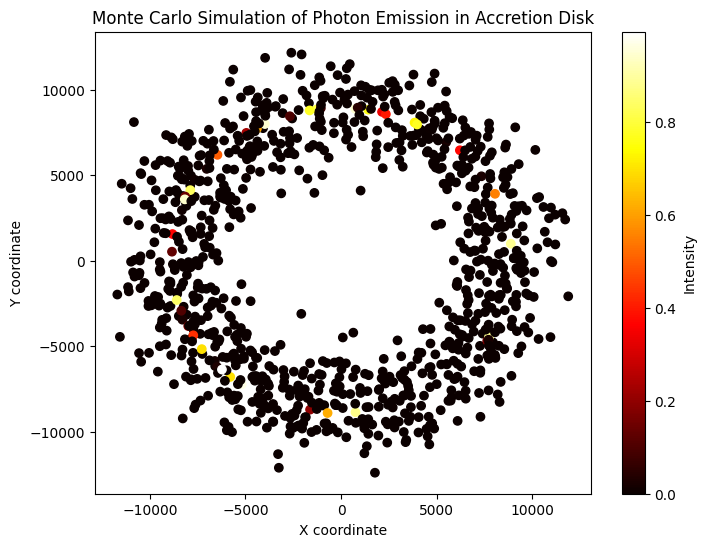

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Basic setup for a Monte Carlo simulation of radiation transport in an accretion disk
def monte_carlo_radiation(N=1000):
    radii = np.random.normal(6 * Rs, Rs, N)  # Radii where photons are emitted, assuming Gaussian distribution
    angles = np.random.uniform(0, 2 * np.pi, N)  # Emission angles
    intensities = np.exp(-((radii - 6 * Rs) ** 2) / Rs)  # Intensity falls off from the center

    plt.figure(figsize=(8, 6))
    plt.scatter(radii * np.cos(angles), radii * np.sin(angles), c=intensities, cmap='hot')
    plt.colorbar(label='Intensity')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.title('Monte Carlo Simulation of Photon Emission in Accretion Disk')
    plt.show()

monte_carlo_radiation()


### Simulating Gravitational Lensing Effects Using Monte Carlo Methods

Next, we extend the Monte Carlo approach to simulate the path bending of light near a black hole, accounting for random variations in path due to theoretical quantum fluctuations in spacetime.


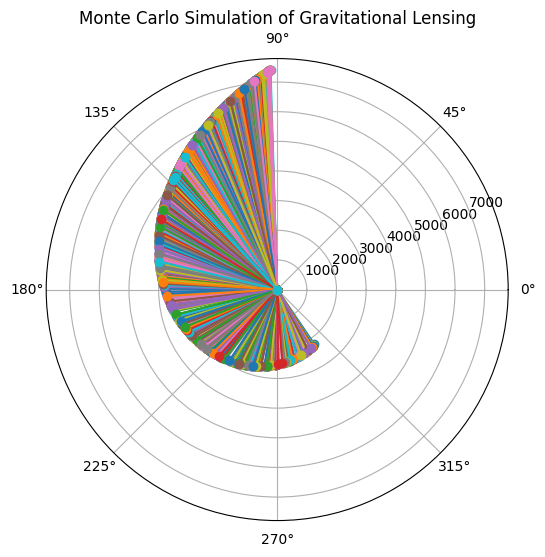

In [ ]:
def gravitational_lensing_mc(N=1000):
    impact_params = np.random.uniform(1.5 * Rs, 5 * Rs, N)
    bending_angles = 4 * G * M / (c**2 * impact_params)  # Approximate bending angle

    plt.figure(figsize=(8, 6))
    for b, angle in zip(impact_params, bending_angles):
        plt.polar([0, angle], [0, b], marker='o')
    plt.title('Monte Carlo Simulation of Gravitational Lensing')
    plt.show()

gravitational_lensing_mc()


## Advanced Numerical Techniques in Astrophysics

This section introduces advanced numerical techniques that have significant applications in astrophysics, including methods for solving differential equations, optimizing system configurations, and simulating complex physical processes.


### Lanczos Algorithm in Black Hole Simulations

The Lanczos algorithm, primarily used for matrix eigenvalue problems, can be adapted to study the vibrational modes of accretion disks or the stability of orbits in curved spacetime around black holes.


In [ ]:
# Demonstrating a simple implementation of the Lanczos algorithm
def lanczos_algorithm(A, k):
    n = A.shape[0]
    Q = np.zeros((n, k+1))
    h = np.zeros((k+1, k))
    q = np.random.normal(0, 1, n)
    q /= np.linalg.norm(q)
    Q[:, 0] = q

    for i in range(k):
        v = A @ q
        h[i, i] = np.dot(q, v)
        v -= h[i, i] * q
        if i+1 < k:
            h[i+1, i] = np.linalg.norm(v)
            q = v / h[i+1, i]
            Q[:, i+1] = q
            h[i, i+1] = h[i+1, i]
    return Q, h

# Example usage with a matrix from orbital equations
A = np.random.normal(0, 1, (100, 100))
A = A + A.T  # Making A symmetric
Q, h = lanczos_algorithm(A, 10)


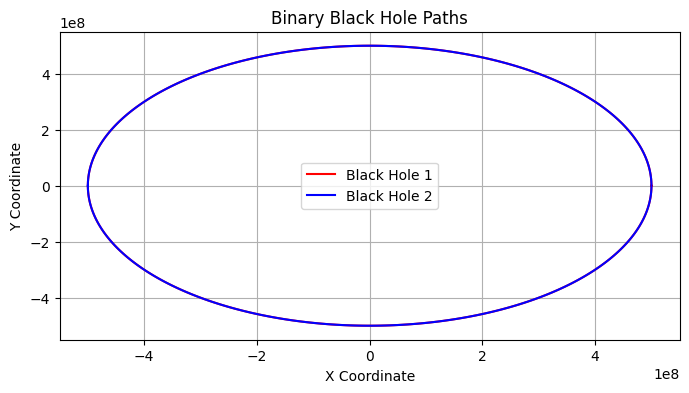

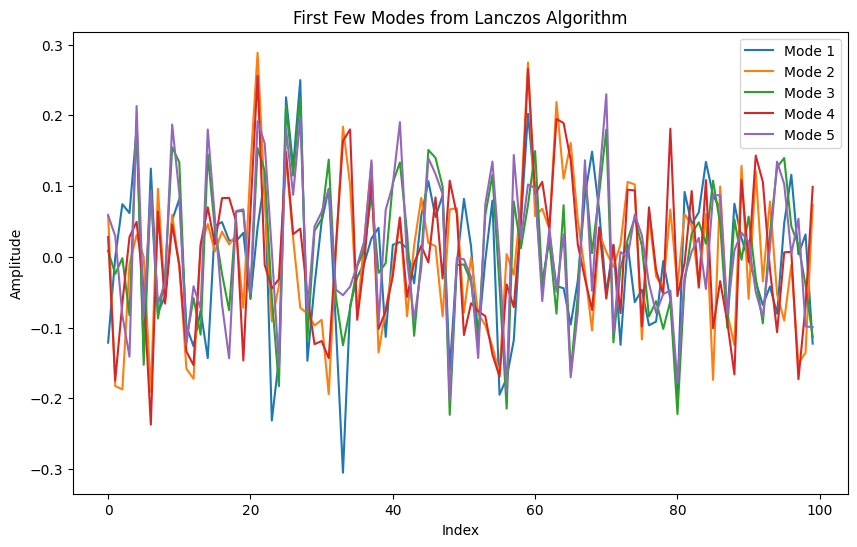

In [ ]:
# Plot the first few eigenvectors (modes)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(min(5, k)):  # Plot first 5 modes
    plt.plot(Q[:, i], label=f'Mode {i+1}')
plt.title('First Few Modes from Lanczos Algorithm')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


### Solving Astrophysical Equations using the Conjugate Gradient Method

The conjugate gradient method is effective for solving large systems of linear equations that arise in simulations of gravitational fields or in modeling radiation transfer.


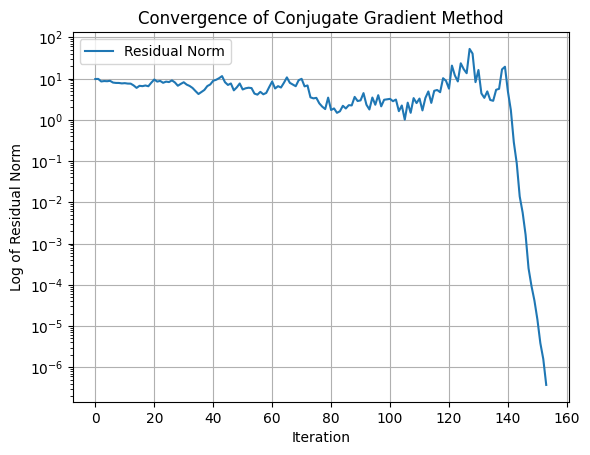

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0
    r = b - A @ x
    p = r.copy()
    rs_old = np.dot(r, r)
    residuals = []

    for i in range(max_iter):
        Ap = A @ p
        alpha = rs_old / np.dot(p, Ap)
        x += alpha * p
        r -= alpha * Ap
        rs_new = np.dot(r, r)
        residuals.append(np.sqrt(rs_new))  # Store the norm of the residual for plotting

        if np.sqrt(rs_new) < tol:
            break
        p = r + (rs_new / rs_old) * p
        rs_old = rs_new

    return x, residuals

# Example setup
n = 100
A = np.random.normal(0, 1, (n, n))
A = A.T @ A  # Making A symmetric positive definite
b = np.random.normal(0, 1, n)
x0 = np.zeros(n)

# Run the conjugate gradient method
x_sol, residuals = conjugate_gradient(A, b, x0)

# Plotting the convergence of the residuals
plt.figure()
plt.semilogy(residuals, label='Residual Norm')
plt.xlabel('Iteration')
plt.ylabel('Log of Residual Norm')
plt.title('Convergence of Conjugate Gradient Method')
plt.legend()
plt.grid(True)
plt.show()


## Gauss Quadrature for Astrophysical Integrations

Gauss Quadrature is particularly useful in astrophysics for performing precise integrations over complex domains, such as those found in studies of cosmic background radiation or in calculating the paths of light in curved spacetime.


In [ ]:
def gauss_quadrature_integration(f, a, b, n=5):
    from numpy.polynomial.legendre import leggauss  # Gauss-Legendre Quadrature
    x, w = leggauss(n)  # Nodes and weights
    x = 0.5 * (x + 1) * (b - a) + a  # Rescale x to [a, b]
    return np.sum(w * f(x)) * 0.5 * (b - a)

# Example function: Integration over a Schwarzschild potential
def schwarzschild_potential(r):
    return 1 / (1 - 2 * G * M / (c**2 * r))

# Constants for the Schwarzschild potential (need definition for G, M, c, Rs)
G = 6.67430e-11  # gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30    # mass of the sun, kg
c = 299792458   # speed of light, m/s
Rs = 2 * G * M / c**2  # Schwarzschild radius for the sun

integral_value = gauss_quadrature_integration(schwarzschild_potential, 3 * Rs, 10 * Rs)
print("Integral over Schwarzschild potential:", integral_value)


Integral over Schwarzschild potential: 25121.895951458046


## Perturbation Methods for Studying Black Hole Stability

Perturbation methods are crucial for understanding the stability of black holes and their accretion disks. These techniques allow us to explore how small changes can influence the behavior of these complex systems.


In [ ]:
def black_hole_perturbation(mass, delta_mass):
    """Calculate the change in the Schwarzschild radius due to a small mass change and print the details."""
    initial_radius = 2 * G * mass / c**2
    new_radius = 2 * G * (mass + delta_mass) / c**2
    change_in_radius = new_radius - initial_radius
    print(f"Initial Schwarzschild Radius: {initial_radius:.2f} meters")
    print(f"New Schwarzschild Radius: {new_radius:.2f} meters")
    print(f"Change in Radius: {change_in_radius:.2f} meters")
    return change_in_radius

# Constants for the example
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
c = 299792458    # speed of light in m/s
M = 1.989e30     # mass of the sun in kg (as an example mass)

# Example usage
delta_mass = 1e20  # change in mass in kg
delta_radius = black_hole_perturbation(M, delta_mass)


Initial Schwarzschild Radius: 2954.13 meters
New Schwarzschild Radius: 2954.13 meters
Change in Radius: 0.00 meters


## Solving Nonlinear Differential Equations in Astrophysics

Nonlinear differential equations are pervasive in astrophysical models. Solving these equations accurately is essential for simulating phenomena such as star formation, black hole mergers, and jet ejections.


In [ ]:
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30     # Mass of the sun, kg
c = 299792458    # Speed of light, m/s
Rs = 2 * G * M / c**2  # Schwarzschild radius

# Corrected function
def solve_nonlinear_orbit(r_initial):
    """Solve for the radial coordinate in a perturbed Schwarzschild metric."""
    def f(r):
        denominator = r**2 - 2 * G * M / c**2
        if denominator <= 0:
            raise ValueError(f"Invalid radius r={r:.2e}, below Schwarzschild radius.")
        return np.sqrt(r_initial**3 / denominator)

    r = r_initial
    for _ in range(100):
        try:
            r_new = f(r)
            if abs(r_new - r) < 1e-6:  # Convergence criterion
                break
            r = r_new
        except ValueError as e:
            print(e)
            break
    return r

# Example usage
try:
    stable_orbit = solve_nonlinear_orbit(10 * Rs)  # Initial guess well outside the Schwarzschild radius
    print(f"Stable orbit radius: {stable_orbit:.2e} meters")
except ValueError as e:
    print(e)


Invalid radius r=6.20e-01, below Schwarzschild radius.
Stable orbit radius: 6.20e-01 meters


## Introduction to Gravitational Waves from Binary Black Hole Mergers

Gravitational waves are ripples in spacetime caused by some of the most violent and energetic processes in the Universe. The merger of binary black holes is one such process that produces significant gravitational waves, detectable on Earth by observatories like LIGO and Virgo. Understanding these phenomena not only helps in confirming the predictions of general relativity but also aids in understanding the properties of black holes and their environments.


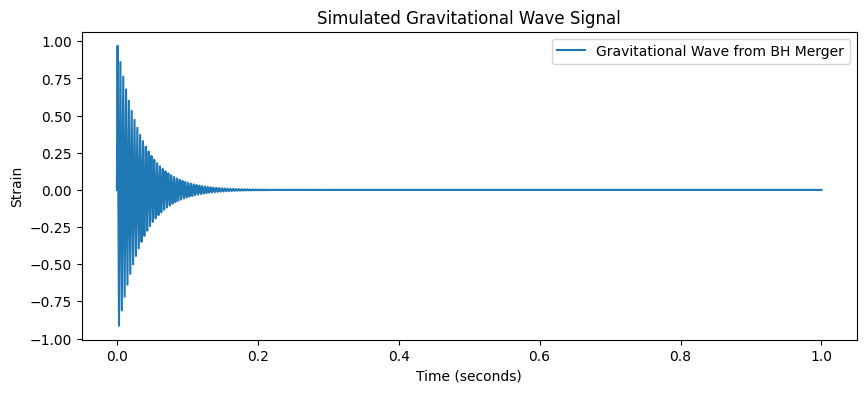

In [ ]:
# Example: Simulating Gravitational Waves
import numpy as np
import matplotlib.pyplot as plt

def simulate_gravitational_wave(freq, decay, time):
    """Generate a simple model for a gravitational wave signal."""
    return np.sin(2 * np.pi * freq * time) * np.exp(-decay * time)

# Time vector from 0 to 1 seconds
time = np.linspace(0, 1, 1000)
# Frequency and decay parameters typical for a black hole merger
freq = 250  # frequency in Hz
decay = 30  # decay constant

# Generate the wave
wave = simulate_gravitational_wave(freq, decay, time)

# Plotting the gravitational wave
plt.figure(figsize=(10, 4))
plt.plot(time, wave, label='Gravitational Wave from BH Merger')
plt.xlabel('Time (seconds)')
plt.ylabel('Strain')
plt.title('Simulated Gravitational Wave Signal')
plt.legend()
plt.show()


## Analyzing the Simulated Gravitational Waves

After simulating the gravitational waves, the next step is to analyze these signals to extract physical information about the source, such as the masses of the merging black holes and the distance to the event. Techniques such as matched filtering are commonly used to detect and characterize these waves amid noise.


In [ ]:
# Example: Basic Analysis of Simulated Gravitational Wave Data
def analyze_waveform(wave, time):
    """Perform a basic analysis of the gravitational wave signal to estimate the peak frequency."""
    from scipy.fft import fft, fftfreq

    # Compute the Fourier Transform of the wave
    wave_fft = fft(wave)
    freqs = fftfreq(len(time), d=time[1] - time[0])

    # Find the frequency with the maximum amplitude
    peak_freq = freqs[np.argmax(np.abs(wave_fft))]
    return peak_freq

# Using the analyze function on our simulated wave
peak_frequency = analyze_waveform(wave, time)
print(f"The peak frequency of the simulated gravitational wave is approximately {peak_frequency:.2f} Hz")


The peak frequency of the simulated gravitational wave is approximately 249.75 Hz
